### 亚洲足球国家队分类

#### 加载数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
data = pd.read_csv('./AsiaFootball.txt')
data

,国家,2006年世界杯,2010年世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [12]:
X = data.iloc[:,1:]
X

,2006年世界杯,2010年世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


#### 建模

In [13]:
kmeans = KMeans(n_clusters=3)
# 建模，训练
kmeans.fit(X) # 无监督学习,随机给聚类中心

KMeans(n_clusters=3)

In [14]:
y_ = kmeans.predict(X)
y_ #array([2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2])

array([2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2])

In [15]:
c = data['国家'].values
c

array(['中国', '日本', '韩国', '伊朗', '沙特', '伊拉克', '卡塔尔', '阿联酋', '乌兹别克斯坦', '泰国',
       '越南', '阿曼', '巴林', '朝鲜', '印尼'], dtype=object)

In [16]:
for i in range(3):
    cond = y_ == i
    print('类别是%d国家有：'%(i),c[cond])

类别是0国家有： ['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']
类别是1国家有： ['日本' '韩国']
类别是2国家有： ['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']


#### 可视化

In [17]:
from matplotlib import font_manager

In [18]:
fm = font_manager.FontManager()

In [19]:
[font.name for font in fm.ttflist]

['DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'cmtt10',
 'DejaVu Sans',
 'STIXGeneral',
 'cmb10',
 'cmr10',
 'STIXSizeOneSym',
 'cmss10',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'cmmi10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmsy10',
 'cmex10',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'Microsoft PhagsPa',
 'Felix Titling',
 'STXingkai',
 'Garamond',
 'Consolas',
 'Century Schoolbook',
 'Chiller',
 'Lucida Sans',
 'Segoe UI Variable',
 'Lucida Sans',
 'Bodoni MT',
 'Dubai',
 'Lucida Fax',
 'Palatino Linotype',
 'Constantia',
 'Maiandra GD',
 'Microsoft YaHei',
 'Calibri',
 'Bodoni MT',
 'STHupo',
 'Cambria',
 'Broadway',

In [21]:
from mpl_toolkits.mplot3d import Axes3D

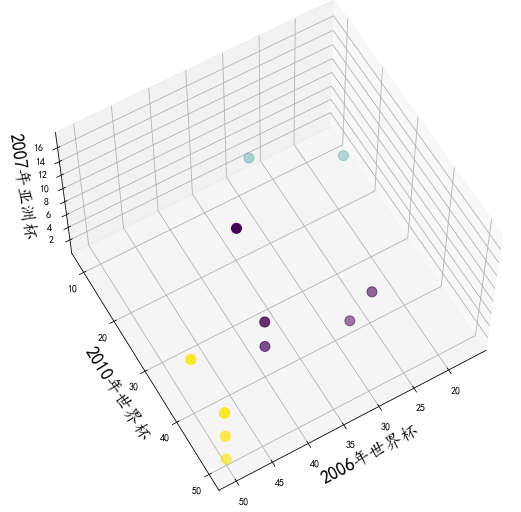

In [24]:

plt.rcParams['font.family'] = 'KaiTi'

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection = '3d')

ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c = y_,s = 100)

ax.set_xlabel('2006年世界杯',fontsize = 18)
ax.set_ylabel('2010年世界杯',fontsize = 18)
ax.set_zlabel('2007年亚洲杯',fontsize = 18)

ax.view_init(60,60)

### K值选择

#### 导包

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 聚类：轮廓系数，对聚类的评价指标，对应数学公式
from sklearn.metrics import silhouette_score

#### 创建数据

In [29]:
plt.rcParams['axes.unicode_minus'] = False

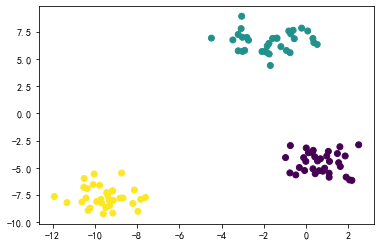

In [30]:
# 创建数据
# 假数据，数据X划分成3类
X,y = datasets.make_blobs(centers=3,random_state=100)
plt.scatter(X[:,0],X[:,1],c = y)

#### 根据评价指标筛选K值

Text(0, 0.5, '轮廓系数')

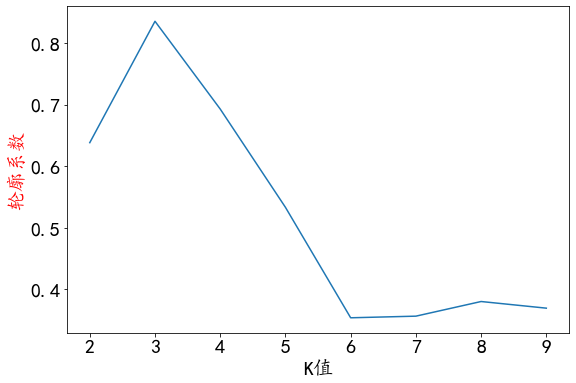

In [34]:
# 算法，实战，AB测试
# 用户5000W，100W拿出来，使用算法，100W不使用算法，1个月对比
# 不同算法，3个算法，分别拿去3个100W用户，3组用户群，使用不同的算法策略，运行一段时间，对比！！！
plt.rcParams['font.size'] = 20
plt.figure(figsize=(9,6))
scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_ = kmeans.predict(X)# 预测类别 == 标签
    scores.append(silhouette_score(X,y_)) # 不同聚类个数k，轮廓系数得分


plt.plot(range(2,10),scores)
plt.xlabel('K值')
plt.ylabel('轮廓系数',c = 'red')